In [40]:
'''
AUTHOR: CONOR LANE, 9th May 2023,  conor.lane1995@gmail.com
INPUTS: The cell_dict output for both recordings, separated using split using split_2combined_recordings.py.
mutually_responsive_cells.csv output from get_mutually_responsive_cells.py.  List of all the cell numbers that were detected as responsive in both halfs
of the recording. 
OUTPUTS: Correlation matrices for both sets of cells
NOTES: remember to manually set vmax and vmin in the correlation plots. 

'''

'\nAUTHOR: CONOR LANE, 9th May 2023,  conor.lane1995@gmail.com\nINPUTS: The cell_dict output for both recordings, separated using split using split_2combined_recordings.py.\nmutually_responsive_cells.csv output from get_mutually_responsive_cells.py.  List of all the cell numbers that were detected as responsive in both halfs\nof the recording. \nOUTPUTS: Correlation matrices for both sets of cells, saved as .png to SAVE_PATH\nNOTES: remember to manually set vmax and vmin in the correlation plots. \n\n'

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [42]:
# Load the required cell dictionaries, and the mutually responsive cells list. 

RECORDING_1 = "J:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/Psilocybin_combined/rec1/cells.pkl"
with open(RECORDING_1,'rb') as f:
    cells_1 = pickle.load(f)

RECORDING_2 = "J:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/Psilocybin_combined/rec2/cells.pkl"
with open(RECORDING_2,'rb') as f:
    cells_2 = pickle.load(f)

mutual_cell_path = "J:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/Psilocybin_combined/mutually_responsive_cells.csv"
mutual_cells = list(np.genfromtxt(mutual_cell_path, delimiter=','))
mutual_cells = [int(num) for num in mutual_cells]

In [43]:
# Extract from the dictionary the number of frequencies, intensities and trials presented. 

nfreq = list(cells_1[mutual_cells[0]]['traces'].keys())
nInt = list(cells_1[mutual_cells[0]]['traces'][nfreq[0]].keys())
ntrial = list(cells_1[mutual_cells[0]]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [44]:
# Filter both dictionaries so that only the mutually responsive cells are retained. 

cells_1 = {key: cells_1[key] for key in mutual_cells}
cells_2 = {key: cells_2[key] for key in mutual_cells}

In [45]:
# For both recordings, extract the trials for every combination into a matrix of shape nfreq x nInt x nTrials x nCells x nFrames

matrix_1 = np.array([[[[cells_1[n]['traces'][i][j][k] for n in cells_1.keys()] for k in ntrial] for j in nInt] for i in nfreq])
print(matrix_1.shape)

matrix_2 = np.array([[[[cells_2[n]['traces'][i][j][k] for n in cells_2.keys()] for k in ntrial] for j in nInt] for i in nfreq])
print(matrix_1.shape)

(12, 4, 10, 221, 15)
(12, 4, 10, 221, 15)


In [46]:

# Average the matrix over the second axis, so that the 10 trials are condensed to 1 average trial response. 
matrix_1_av = matrix_1.mean(axis=2)
print(matrix_1_av.shape)
#baseline subtract, so that the mean of the five pre-response frames is removed from the mean of the response.  
matrix_res_1 = matrix_1_av[:,:,:,5:].mean(axis=-1) - matrix_1_av[:,:,:,:4].mean(axis=-1)
print(matrix_res_1.shape)

matrix_2_av = matrix_2.mean(axis=2)
print(matrix_2_av.shape)
matrix_res_2 = matrix_2_av[:,:,:,5:].mean(axis=-1) - matrix_2_av[:,:,:,:4].mean(axis=-1)
print(matrix_res_2.shape)



(12, 4, 221, 15)
(12, 4, 221)
(12, 4, 221, 15)
(12, 4, 221)


In [47]:
# Reshape the matrices so that all of the response combinations are flattened, with one dimension for each cell. nFrames (flat) x nCells

matrix_flatten_1 = (matrix_res_1).reshape(-1,len(matrix_res_1[0,0,:]))
print(matrix_flatten_1.shape)


matrix_flatten_2 = (matrix_res_2).reshape(-1,len(matrix_res_2[0,0,:]))
print(matrix_flatten_2.shape)

(48, 221)
(48, 221)


In [48]:
scaler = StandardScaler()
matrix_flatten_1 = scaler.fit_transform(matrix_flatten_1)
matrix_flatten_2 = scaler.fit_transform(matrix_flatten_2)

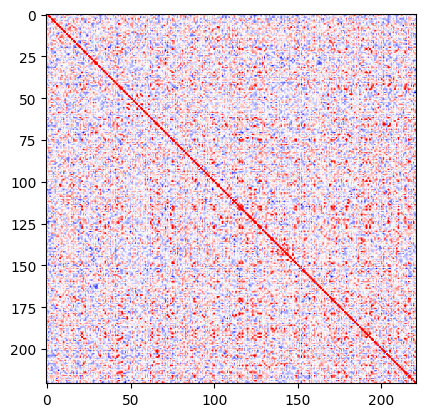

In [51]:
# Compute the pairwise correlations for every cell 
cc_1 = 1-pairwise_distances(matrix_flatten_1.T, metric='correlation')
plt.imshow(cc_1, vmin=-.5, vmax=.5, cmap='bwr')

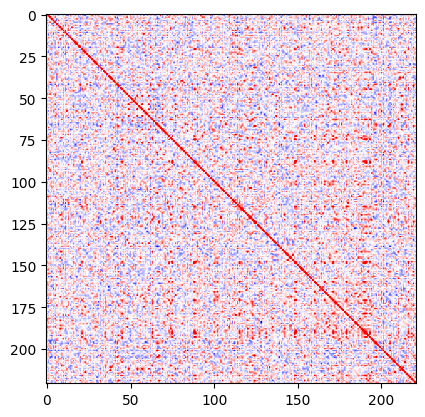

In [52]:
# Compute the pairwise correlations for every cell
cc_2 = 1-pairwise_distances(matrix_flatten_2.T, metric='correlation')
plt.imshow(cc_2, vmin=-.5, vmax=.5, cmap='bwr')